In [1]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in the files
consolidated_file=pd.read_csv('Resources/consolidated_coin_data.csv')
crypto_markets=pd.read_csv('Resources/crypto-markets.csv')
income_data=pd.read_csv('Resources/cleaned_disposable_inc.csv')

In [3]:
# Convert to DataFrame
consolidated_df=pd.DataFrame(consolidated_file)
crypto_df=pd.DataFrame(crypto_markets)
income_df=pd.DataFrame(income_data)

In [4]:
# Drop out some columns from crypto_df
crypto_df=crypto_df[['name','date','open','high','low','close','volume','market','spread']]

In [5]:
# Convert the data from last 6 columns
column_list=['Open','High','Low','Close','Volume','Market Cap']
for x in column_list:
    consolidated_df[x] = consolidated_df[x].str.replace(',', '').astype(float)

In [6]:
# Rename columns for consolidated_df
consolidated_df=consolidated_df.rename(columns={'Currency':'Name','Market Cap':'Market_Cap'})

In [7]:
# Rename the columns from the crypto_df
crypto_df=crypto_df.rename(columns={'name':'Name',\
                                    'open':'Open',\
                                    'high':'High',\
                                    'date':'Date',\
                                    'low':'Low',\
                                    'close':'Close',\
                                    'volume':'Volume',\
                                    'market':'Market_Cap',\
                                    'spread':'Spread'})

In [8]:
# Double check the type for the DataFrame
consolidated_df.dtypes

Name           object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market_Cap    float64
dtype: object

In [9]:
# Display the newly updated DataFrame
consolidated_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509.0
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342.0
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179.0
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390.0
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680.0
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979.0
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596.0
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918.0
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964.0


In [10]:
# Display the crypto_df
crypto_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap,Spread
0,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,3.88
1,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,13.49
2,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,12.88
3,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17
4,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,33.32
...,...,...,...,...,...,...,...,...,...
942292,Project-X,2018-11-26,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,5441.80
942293,Project-X,2018-11-27,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,4449.20
942294,Project-X,2018-11-28,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,5347.00
942295,Project-X,2018-11-29,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,3124.52


In [11]:
# Set the index to Currency column 
consolidated_df=consolidated_df.set_index('Name')

In [12]:
# Filter out for just bitcoin
btc_df=consolidated_df.loc['bitcoin']

In [13]:
# Display the btc_df
btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap
Name,,,,,,,
bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11
bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11
bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11
bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11
bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11
...,...,...,...,...,...,...,...
bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09
bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09
bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09


In [14]:
# Convert the date to Mm-yyyy format
btc_df['Month_Year']=pd.to_datetime(btc_df['Date']).dt.to_period('M')

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Display the cleaned btc_df
btc_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year
Name,,,,,,,,
bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11,2019-12
bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11,2019-12
bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11,2019-12
bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11,2019-12
bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11,2019-11
...,...,...,...,...,...,...,...,...
bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,2013-05
bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,2013-05
bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,2013-04


In [16]:
# Lower the values in the name column
crypto_df['Name']=crypto_df['Name'].str.lower()

In [17]:
# Convert date to MM-yyyy
crypto_df['Month_Year']=pd.to_datetime(crypto_df['Date']).dt.to_period('M')

In [18]:
# Display the crypto_df
crypto_df

,Name,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year
0,bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,3.88,2013-04
1,bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,13.49,2013-04
2,bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,12.88,2013-04
3,bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17,2013-05
4,bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,33.32,2013-05
...,...,...,...,...,...,...,...,...,...,...
942292,project-x,2018-11-26,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,5441.80,2018-11
942293,project-x,2018-11-27,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,4449.20,2018-11
942294,project-x,2018-11-28,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,5347.00,2018-11
942295,project-x,2018-11-29,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,3124.52,2018-11


In [19]:
# Set the index to name
crypto_df=crypto_df.set_index('Name')

In [20]:
# Filter out the bitcoin
btc_spread_df=crypto_df.loc['bitcoin']

In [21]:
# Display the btc1_df
btc_spread_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Spread,Month_Year
Name,,,,,,,,,
bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,3.88,2013-04
bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,13.49,2013-04
bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,12.88,2013-04
bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,32.17,2013-05
bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,33.32,2013-05
...,...,...,...,...,...,...,...,...,...
bitcoin,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,535.81,2018-11
bitcoin,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22,2018-11
bitcoin,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95,2018-11


In [22]:
# Join two dataframe
final_df=pd.concat([btc_df,btc_spread_df])

In [23]:
# Append and filter out the spread with matched date
new_df=final_df[~pd.isnull(final_df['Spread'])]

In [24]:
# Display the newly created df
new_df

,Date,Open,High,Low,Close,Volume,Market_Cap,Month_Year,Spread
Name,,,,,,,,,
bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,2013-04,3.88
bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,2013-04,13.49
bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,2013-04,12.88
bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,2013-05,32.17
bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,2013-05,33.32
...,...,...,...,...,...,...,...,...,...
bitcoin,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,2018-11,535.81
bitcoin,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,2018-11,463.22
bitcoin,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,2018-11,201.95


In [55]:
# Export out the new_df to csv file
new_df.to_csv('Resources/cleaned_btc.csv')

In [25]:
# Add the Y_Average for the new_df
new_df['Y_Average']=(new_df['Open']+new_df['High']+new_df['Low']+new_df['Close'])/4

C:\Users\phuph\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# Convert the Month_Year to period[M] type for income_df
income_df['Month_Year']=income_df['Month_Year'].astype('period[M]')

In [27]:
# Join the new_df with the income_df
income_btc_df=income_df.merge(new_df,on='Date')

In [56]:
# Display the incom_btc_df
income_btc_df.head(10)

,Date,Income,Open,High,Low,Close,Volume,Market_Cap,Spread,Y_Average
0,2013-05-01,39054.0,139.00,139.89,107.72,116.99,0.0,1.298955e+09,32.17,125.9000
1,2013-06-01,39071.0,128.82,129.78,127.20,129.30,0.0,1.451916e+09,2.58,128.7750
2,2013-07-01,39004.0,97.51,97.66,86.30,88.05,0.0,1.000065e+09,11.36,92.3800
3,2013-08-01,39063.0,106.21,108.00,103.01,104.00,0.0,1.195225e+09,4.99,105.3050
4,2013-09-01,39194.0,135.14,145.81,134.81,138.34,0.0,1.610215e+09,11.00,138.5250
5,2013-10-01,39064.0,132.68,134.63,131.55,132.18,0.0,1.557001e+09,3.08,132.7600
6,2013-11-01,39165.0,203.90,206.65,202.13,206.18,0.0,2.460743e+09,4.52,204.7150
7,2013-12-01,39265.0,1128.92,1133.08,801.82,955.85,0.0,1.153171e+10,331.26,1004.9175
8,2014-01-01,39432.0,754.97,775.35,754.97,771.40,22489400.0,9.403308e+09,20.38,764.1725
9,2014-02-01,39655.0,828.61,853.52,827.11,832.58,19668700.0,1.027520e+10,26.41,835.4550


In [66]:
income_btc_df['Y_Average'].unique()

array([  125.9   ,   128.775 ,    92.38  ,   105.305 ,   138.525 ,
         132.76  ,   204.715 ,  1004.9175,   764.1725,   835.455 ,
         557.05  ,   471.93  ,   453.4075,   636.335 ,   645.0425,
         590.6675,   477.4725,   385.8   ,   331.495 ,   379.455 ,
         317.2775,   221.855 ,   255.5175,   245.0475,   234.7675,
         226.5425,   260.7275,   282.3325,   229.115 ,   236.905 ,
         319.9475,   368.8475,   432.205 ,   372.11  ,   436.2525,
         417.18  ,   450.1925,   534.1875,   676.14  ,   615.7175,
         573.9925,   612.27  ,   717.23  ,   751.7875,   980.9425,
         979.9525,  1201.1825,  1076.255 ,  1388.13  ,  2358.2325,
        2465.4125,  2799.13  ,  4791.0775,  4354.585 ,  6588.3675,
       10478.8875, 13759.075 ,  9627.23  , 10685.25  ,  6858.7775,
        9129.3525,  7513.555 ,  6379.91  ,  7666.985 ,  7129.6   ,
        6602.9625,  6388.7225])

In [67]:
y_new1

array([[ 477.74240314],
       [ 455.89084842],
       [ 218.43483982],
       [ 687.16860374],
       [ 967.4679023 ],
       [ 590.87566683],
       [7527.34763001],
       [ 216.53192624],
       [7198.2055341 ],
       [ 437.10836566],
       [ 274.72935006],
       [6833.46467305],
       [ 278.51722704],
       [ 205.16250188],
       [6455.15587719],
       [ 459.9649311 ],
       [1410.39619698]])

In [29]:
# Drop some columns
income_btc_df=income_btc_df[['Date','Income','Open','High','Low','Close','Volume','Market_Cap','Spread','Y_Average']]

In [42]:
# Select the X and y for the machine
X=income_btc_df.drop(['Date','High','Open','Close','Low','Y_Average'],axis=1)
y=income_btc_df['Y_Average'].values.reshape(-1, 1)

In [43]:
print(X.shape,y.shape)

(67, 4) (67, 1)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [46]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [47]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [48]:
# Create a Linear Regression model
model = LinearRegression()

In [49]:
# Fit in the model
model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [50]:
print(model)

LinearRegression()


In [51]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.00553592  0.06788141  0.90844071  0.00943712]]
y-axis intercept:  [0.00691859]


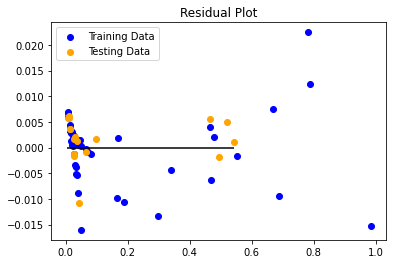

In [52]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [54]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[0.02819719]
 [0.0265983 ]
 [0.00922351]
 [0.04352103]
 [0.06403069]
 [0.03647522]
 [0.54402089]
 [0.00908427]
 [0.51993738]
 [0.02522397]]
First 10 Actual stats: [[0.02618135]
 [0.02817744]
 [0.00337646]
 [0.05437123]
 [0.06494419]
 [0.03523987]
 [0.54301168]
 [0.00295463]
 [0.51491747]
 [0.02641659]]


In [62]:
y_new = y_scaler.inverse_transform(y_test_scaled)


In [64]:
y_new1 = y_scaler.inverse_transform(predictions)


In [63]:
y_new

array([[ 450.1925],
       [ 477.4725],
       [ 138.525 ],
       [ 835.455 ],
       [ 979.9525],
       [ 573.9925],
       [7513.555 ],
       [ 132.76  ],
       [7129.6   ],
       [ 453.4075],
       [ 226.5425],
       [6858.7775],
       [ 229.115 ],
       [ 125.9   ],
       [6379.91  ],
       [ 436.2525],
       [1388.13  ]])

In [65]:
y_new1

array([[ 477.74240314],
       [ 455.89084842],
       [ 218.43483982],
       [ 687.16860374],
       [ 967.4679023 ],
       [ 590.87566683],
       [7527.34763001],
       [ 216.53192624],
       [7198.2055341 ],
       [ 437.10836566],
       [ 274.72935006],
       [6833.46467305],
       [ 278.51722704],
       [ 205.16250188],
       [6455.15587719],
       [ 459.9649311 ],
       [1410.39619698]])